In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 

In [2]:
batch_size = 32
dataset = tf.keras.preprocessing.image_dataset_from_directory(
                "/Users/abdulbari/Downloads/PlantVillage",
                batch_size=batch_size,
                image_size=(256,256),
                seed=42
            )


Found 16011 files belonging to 10 classes.


In [3]:
class_names = dataset.class_names
length = len(dataset)
print(class_names)
print(length)

['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
501


## Viewing the data

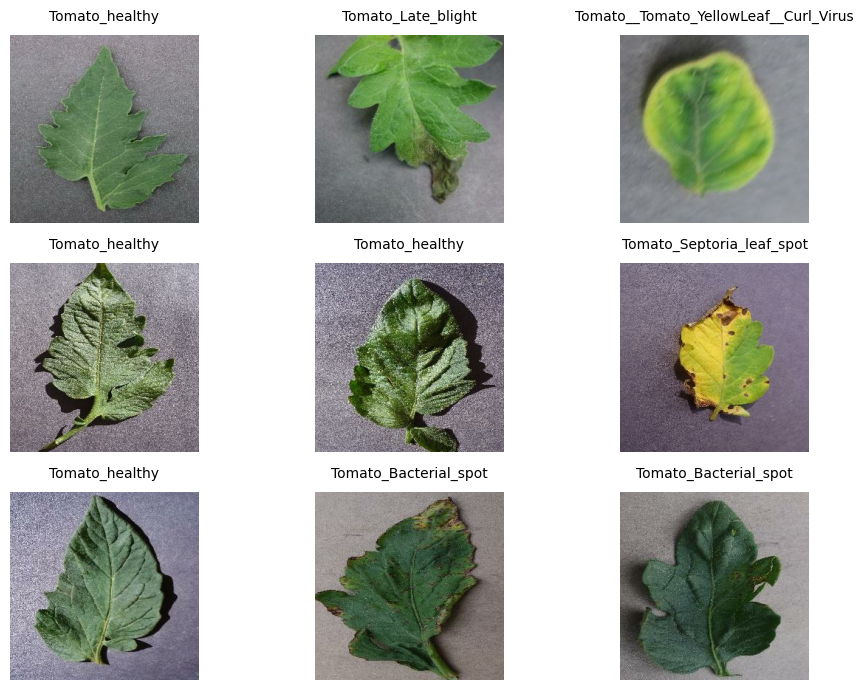

In [24]:
import random

rand_batch_index = random.randint(0, length-1)
selected_batch = dataset.skip(rand_batch_index).take(1)
rand_image_index = random.randint(0, batch_size-1)

def display_random_images(selected_batch, class_names):

    plt.figure(figsize=(10,7))
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        
        for image_batch, label_batch in selected_batch:   
            ax.imshow(image_batch[rand_image_index] / 255)
            ax.set_title(class_names[label_batch[rand_image_index]], fontsize=10, pad=10)
            ax.axis(False)

    plt.tight_layout()
    plt.show()

display_random_images(selected_batch, class_names)

## Train, test and validation splits

In [5]:
def get_splitted_data(dataset, train_split, validation_split, test_split):
    dataset = dataset.shuffle(length)

    # length of each dataset
    train_len = int(train_split * length)
    validation_len = int(validation_split * length)
    test_len = int(test_split * length)

    # separating the data
    train_data = dataset.take(train_len)
    dataset = dataset.skip(train_len)

    validation_data = dataset.take(validation_len)
    dataset = dataset.skip(validation_len)

    test_data = dataset.take(test_len)

    return train_data, validation_data, test_data
    

In [21]:
train_data, validation_data, test_data = get_splitted_data(dataset, train_split=0.8, validation_split=0.1, test_split=0.1)
len(train_data), len(validation_data), len(test_data)

(400, 50, 50)

### Optimising data pipeline

In [7]:
train_data = train_data.cache().prefetch(tf.data.AUTOTUNE)
validation_data = validation_data.cache().prefetch(tf.data.AUTOTUNE)
test_data = test_data.cache().prefetch(tf.data.AUTOTUNE)

## Model

Epoch 1/8


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-09-28 15:44:47.006029: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:34: Filling up shuffle buffer (this may take a while): 226 of 501
2024-09-28 15:44:52.663683: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 957ms/step - accuracy: 0.3565 - loss: 2.0444

2024-09-28 15:51:26.563088: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:34: Filling up shuffle buffer (this may take a while): 407 of 501
2024-09-28 15:51:30.450644: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


400/400 ━━━━━━━━━━━━━━━━━━━━ 430s 1s/step - accuracy: 0.3569 - loss: 2.0430 - val_accuracy: 0.7500 - val_loss: 0.7256
Epoch 2/8
400/400 ━━━━━━━━━━━━━━━━━━━━ 381s 952ms/step - accuracy: 0.7504 - loss: 0.7272 - val_accuracy: 0.8394 - val_loss: 0.4822
Epoch 3/8
400/400 ━━━━━━━━━━━━━━━━━━━━ 366s 916ms/step - accuracy: 0.8093 - loss: 0.5469 - val_accuracy: 0.8369 - val_loss: 0.4676
Epoch 4/8
400/400 ━━━━━━━━━━━━━━━━━━━━ 369s 922ms/step - accuracy: 0.8556 - loss: 0.4158 - val_accuracy: 0.8925 - val_loss: 0.3037
Epoch 5/8
400/400 ━━━━━━━━━━━━━━━━━━━━ 366s 915ms/step - accuracy: 0.8772 - loss: 0.3532 - val_accuracy: 0.8888 - val_loss: 0.3183
Epoch 6/8
400/400 ━━━━━━━━━━━━━━━━━━━━ 486s 1s/step - accuracy: 0.8832 - loss: 0.3333 - val_accuracy: 0.9056 - val_loss: 0.2463
Epoch 7/8
400/400 ━━━━━━━━━━━━━━━━━━━━ 447s 1s/step - accuracy: 0.9063 - loss: 0.2799 - val_accuracy: 0.8975 - val_loss: 0.2890
Epoch 8/8
400/400 ━━━━━━━━━━━━━━━━━━━━ 471s 1s/step - accuracy: 0.9110 - loss: 0.2601 - val_accuracy: 

<Axes: >

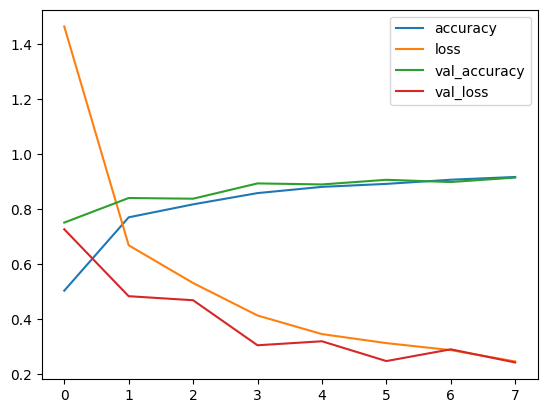

In [9]:
IMAGE_SIZE = 256

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=[IMAGE_SIZE, IMAGE_SIZE, 3]),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_history = model.fit(train_data, batch_size=batch_size, epochs=8, validation_data=validation_data)

pd.DataFrame(model_history.history).plot()


In [38]:
model.evaluate(test_data)

2024-09-29 01:02:30.402271: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:115: Filling up shuffle buffer (this may take a while): 351 of 501
2024-09-29 01:02:34.078809: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 209ms/step - accuracy: 0.9160 - loss: 0.2132


[0.2337857186794281, 0.9175000190734863]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


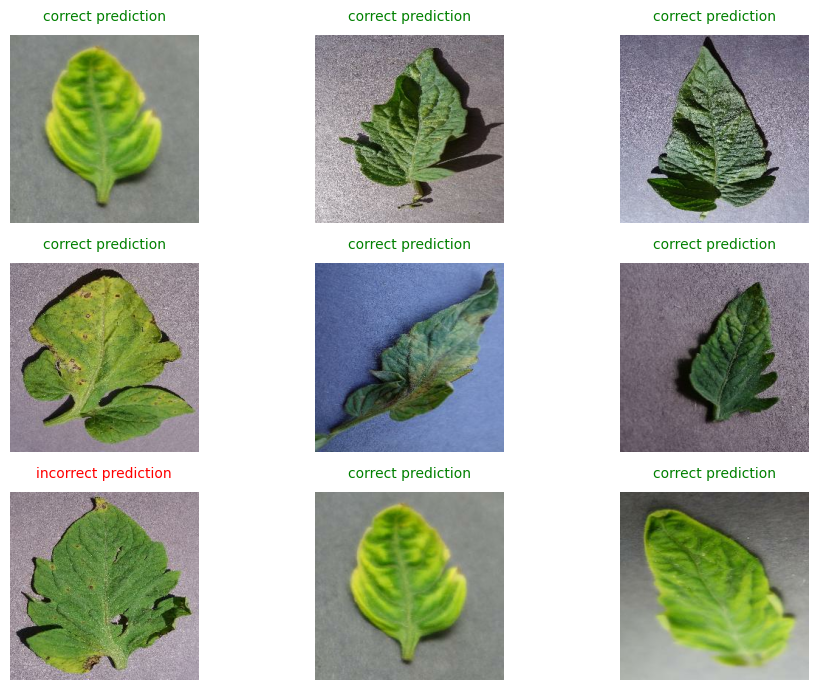

In [41]:
def test_predictions(batch):
    plt.figure(figsize=(10,7))
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
    
        for image_batch, label_batch in batch:
            rand_image_index = random.randint(0, batch_size-1)   
            ax.imshow(image_batch[rand_image_index] / 255)
            predictions = model.predict(image_batch, batch_size=batch_size)
            all_predictions = tf.argmax(predictions, axis=1)
            our_prediction = class_names[all_predictions[rand_image_index]]
            label = class_names[label_batch[rand_image_index]]
            title_color, title = ("green", "correct prediction") if our_prediction == label else ("red", "incorrect prediction")
            ax.set_title(title, color=title_color, fontsize=10, pad=10)
            ax.axis(False)

    plt.tight_layout()
    plt.show()
       
test_predictions(batch=selected_batch)
        